# Week 8

## Jupyter Examples

In [2]:
from IPython.display import display, HTML, Latex
from sklearn.preprocessing import StandardScaler
import pandas as pd
display(HTML("<h2>Cell 2. Import Seed Dataset from UCI Machine Learning and Standardize the data</h2>"))
df=pd.read_csv('seeds_dataset.txt',delim_whitespace=True)
df.columns=['area','perimeter','compactness','length','width','assymetry','groveLength','variety']
X=df.drop(['variety'],axis=1)
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
print(X.describe())

             area   perimeter  compactness      length       width  \
count  209.000000  209.000000   209.000000  209.000000  209.000000   
mean    14.845550   14.557943     0.870999    5.627890    3.258349   
std      2.916545    1.308949     0.023686    0.444029    0.378603   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.260000   13.450000     0.856700    5.262000    2.941000   
50%     14.340000   14.290000     0.873500    5.520000    3.232000   
75%     17.320000   15.730000     0.887900    5.980000    3.562000   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

        assymetry  groveLength  
count  209.000000   209.000000  
mean     3.707278     5.408971  
std      1.503657     0.492487  
min      0.765100     4.519000  
25%      2.587000     5.045000  
50%      3.600000     5.224000  
75%      4.773000     5.877000  
max      8.456000     6.550000  


In [3]:
from sklearn.cluster import AgglomerativeClustering
display(HTML("<h2>Cell 3. Agglomerative Clustering</h2>"))
#
cluster1=AgglomerativeClustering(n_clusters=6)
cluster1.fit(X_scaled)
print("cluster labels: %s"%cluster1.labels_)
print("number of leaves %d"%cluster1.n_leaves_)
print("children %s"%cluster1.children_)

cluster labels: [2 2 2 2 2 2 2 2 0 2 3 2 3 3 2 2 2 2 1 2 2 2 3 2 2 3 3 2 3 3 2 2 2 2 0 2 0
 2 2 3 3 3 5 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 1 5 5 5 0 5
 5 5 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 5 0 0 0 0
 0 0 0 0 0 0 0 0 0 5 5 0 2 0 5 0 0 0 0 0 5 5 5 2 5 2 2 5 1 1 1 1 4 4 3 1 1
 4 1 4 4 4 4 4 1 4 4 4 1 1 1 1 1 3 1 1 4 4 4 1 4 4 4 1 4 4 1 3 1 1 1 1 1 4
 4 4 1 1 4 1 1 4 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1]
number of leaves 209
children [[147 197]
 [ 12  13]
 [148 173]
 [122 129]
 [ 39  40]
 [ 10  44]
 [172 175]
 [ 48  54]
 [  4   6]
 [100 126]
 [146 193]
 [ 70  74]
 [106 135]
 [190 205]
 [ 90 130]
 [199 208]
 [121 132]
 [  5  52]
 [ 65  67]
 [101 124]
 [104 109]
 [ 31  51]
 [103 116]
 [171 186]
 [154 158]
 [142 224]
 [ 83  95]
 [ 75  94]
 [ 41 198]
 [120 221]
 [ 46  47]
 [136 137]
 [176 192]
 [189 215]
 [ 72 105]
 [162 181]
 [156 157]
 [ 84  98]
 [149 165]
 [ 18 219]
 [ 45  57]
 [144 169]
 [ 91 231]
 [200 237]
 [202 206]
 [141 183]
 [  3  21]
 [143 184]
 

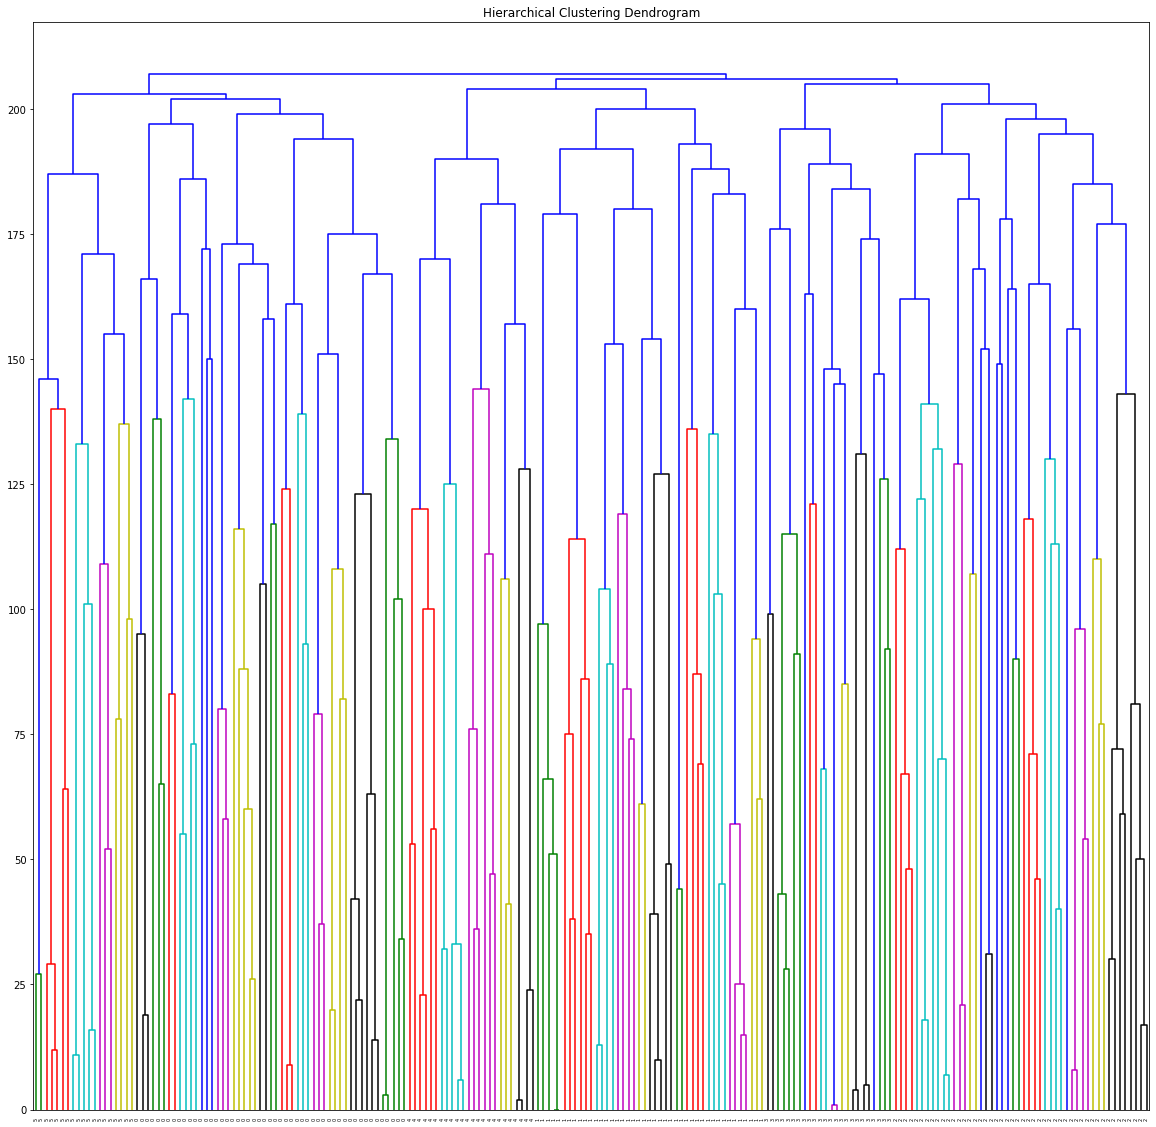

In [4]:
# Source: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
# Authors: Mathew Kallada
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
display(HTML("<h2>Cell 4. Dendogram for Agglomerative Clustering</h2>"))
plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster1, labels=cluster1.labels_)
plt.show()    

In [5]:
from sklearn.cluster import AffinityPropagation
display(HTML("<h2> Jupyter Example 2</h2>"))
display(HTML("<h3>Cell 5. Affinity Propagation</h3>"))
af1=AffinityPropagation().fit(X_scaled)
print('Estimated number of clusters: %d' % len(af1.cluster_centers_indices_))

Estimated number of clusters: 12


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as mp
display(HTML("<h2>Jupyter Example 3</h2>"))
display(HTML("<h3>Cell 6. K-Means Clustering</h3>"))
km1=KMeans(n_clusters=12,n_jobs=-2).fit(X_scaled)
print("cluster centers: %s"%km1.cluster_centers_)
print("cluster labels: %s"%km1.labels_)

cluster centers: [[-1.18837791 -1.05644592 -2.00479976 -0.78025692 -1.46645757  1.01419825
  -0.44376269]
 [ 1.50974263  1.5935512   0.08420312  1.78660505  1.18552489 -0.47377613
   1.75084896]
 [-0.15388042 -0.23282766  0.81095125 -0.45606361  0.12029063 -0.70311641
  -0.81772398]
 [ 1.33317452  1.24447878  1.15857433  1.08904687  1.40033333 -0.55583195
   1.16796251]
 [-0.38291773 -0.51151447  0.93473106 -0.74376329 -0.04404331  1.70232341
  -0.83852031]
 [ 0.65237861  0.72546382  0.15775892  0.71540473  0.59061148  0.41292203
   0.87227459]
 [-0.07342882  0.00522228 -0.18151277  0.10559903 -0.12712846 -0.63336879
  -0.2252878 ]
 [-0.83773017 -0.93845133  0.244724   -1.07065921 -0.64975956 -0.87214952
  -1.22040947]
 [-1.05777392 -1.02984424 -1.03900983 -0.90750935 -1.17215261 -0.10007672
  -0.59148881]
 [-0.92221628 -0.93742044 -0.51136176 -0.88660679 -0.87331881  1.09713313
  -0.62527455]
 [ 1.75677826  1.70779144  0.78213676  1.63288171  1.64298861  1.13303951
   1.58257049]
 [ 0

In [7]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as mp
display(HTML("<h2>Jupyter Example 3</h2>"))
display(HTML("<h3>Cell 7. DBSCAN</h3>"))
db1=DBSCAN(eps=0.8,min_samples=5).fit(X_scaled)
print (db1.components_)
print(db1.labels_)
#print(km1.labels_)

[[-1.90939680e-01 -3.58353257e-01  1.43894519e+00 -7.60533387e-01
   2.08237988e-01 -6.72161018e-01 -1.18860657e+00]
 [-3.45602300e-01 -4.73224163e-01  1.03690395e+00 -6.86035463e-01
   3.19438442e-01 -9.65483603e-01 -1.22931428e+00]
 [-1.60007156e-01 -2.66456532e-01  1.01997590e+00 -5.46069669e-01
   1.42047242e-01 -8.30155229e-01 -9.21971102e-01]
 [-5.34617947e-02 -5.20308410e-02  3.76709911e-01 -1.46489899e-01
   1.72285962e-03 -8.08493502e-02 -3.86664772e-01]
 [-2.52804728e-01 -3.50695197e-01  8.50695375e-01 -4.69314233e-01
   1.15570943e-01 -6.71494375e-01 -8.32414149e-01]
 [-2.80300305e-01 -3.04746834e-01  3.64013871e-01 -4.28679002e-01
  -1.51839672e-01 -1.32680370e+00 -8.30378764e-01]
 [-3.66223983e-01 -3.81327438e-01  2.07429387e-01 -3.36120976e-01
  -2.70983015e-01 -3.80838358e-01 -1.09294347e+00]
 [-3.79971772e-01 -3.88985499e-01  1.43949191e-01 -3.29348438e-01
  -3.82183469e-01 -5.16833376e-01 -1.18860657e+00]
 [-7.30540378e-01 -7.56572398e-01 -1.01507567e-01 -9.07271720e-0

In [8]:
import hdbscan
display(HTML("<h2>Jupyter Example 4</h2>"))
display(HTML("<h3>Cell 8. HDBSCAN</h3>"))

hd1=hdbscan.HDBSCAN(min_cluster_size=3)
hd1_labels=hd1.fit_predict(X_scaled)
print(hd1.labels_)



[ 1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1
 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  3  1  1  1  1  1
  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  4  4  4
  2  4  4  4 -1 -1  1 -1 -1  0  2  2  2  2 -1  0  0 -1  2  2 -1 -1  4  2
 -1 -1  2 -1  2  2  2  2  2  2  4 -1  2  2  2  2 -1  0  2 -1  2  2  2 -1
  4  4  2 -1  2  2  2 -1 -1  2  2  3  4  3 -1  4 -1 -1 -1  1 -1  1  1  1
  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1]
